In [1]:
# Importing all the necessary libraries here.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
import joblib

In [2]:
df = pd.read_csv("D:\My Documents\Internship\dataset4-main/japan.csv")
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [3]:
#EDA

In [4]:
df.shape

(2318, 11)

In [5]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [6]:
# Checking Null Values
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [7]:
df=df.drop(columns=['id'])
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
 6   transmission     2318 non-null   object
 7   drive            2318 non-null   object
 8   hand_drive       2318 non-null   object
 9   fuel             2318 non-null   object
dtypes: int64(4), object(6)
memory usage: 181.2+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [10]:
df2=lab_enc.fit_transform(df['mark'])
df['mark']=df2

In [11]:
df2=lab_enc.fit_transform(df['model'])
df['model']=df2

In [12]:
df2=lab_enc.fit_transform(df['transmission'])
df['transmission']=df2

In [13]:
df2=lab_enc.fit_transform(df['drive'])
df['drive']=df2

In [14]:
df2=lab_enc.fit_transform(df['hand_drive'])
df['hand_drive']=df2

In [15]:
df2=lab_enc.fit_transform(df['fuel'])
df['fuel']=df2

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            2318 non-null   int64
 1   mark             2318 non-null   int32
 2   model            2318 non-null   int32
 3   year             2318 non-null   int64
 4   mileage          2318 non-null   int64
 5   engine_capacity  2318 non-null   int64
 6   transmission     2318 non-null   int32
 7   drive            2318 non-null   int32
 8   hand_drive       2318 non-null   int32
 9   fuel             2318 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 126.9 KB


In [17]:
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,19,143,2003,80000,1240,0,0,2,2
1,110,19,143,2010,53000,1200,0,0,2,2
2,165,19,134,2005,47690,2000,0,0,2,2
3,190,25,29,2008,130661,1990,0,0,2,2
4,190,4,155,2006,66300,660,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
2313,1400,25,242,2009,121000,996,0,0,2,2
2314,1400,25,100,2003,101000,3000,0,0,2,2
2315,1400,23,195,2005,101000,660,1,0,2,2
2316,1400,8,256,2000,170000,660,0,1,2,2


In [18]:
df.describe()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,19.411993,147.894305,2005.972390,100013.194996,1507.010785,0.113891,0.087144,1.992235,1.998274
std,288.673112,7.132919,68.563361,3.698863,52512.478883,549.585170,0.449395,0.289655,0.092583,0.149799
min,80.000000,0.000000,0.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,15.000000,104.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,2.000000,2.000000
50%,1000.000000,24.000000,146.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,2.000000,2.000000
75%,1213.000000,25.000000,204.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,2.000000,2.000000
max,1400.000000,27.000000,257.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


In [19]:
df.skew()

price              -0.466780
mark               -0.947938
model              -0.267060
year               -0.845917
mileage             3.089142
engine_capacity     4.038892
transmission        3.820441
drive               3.193137
hand_drive        -12.811470
fuel                4.146744
dtype: float64

In [20]:
#Distribution

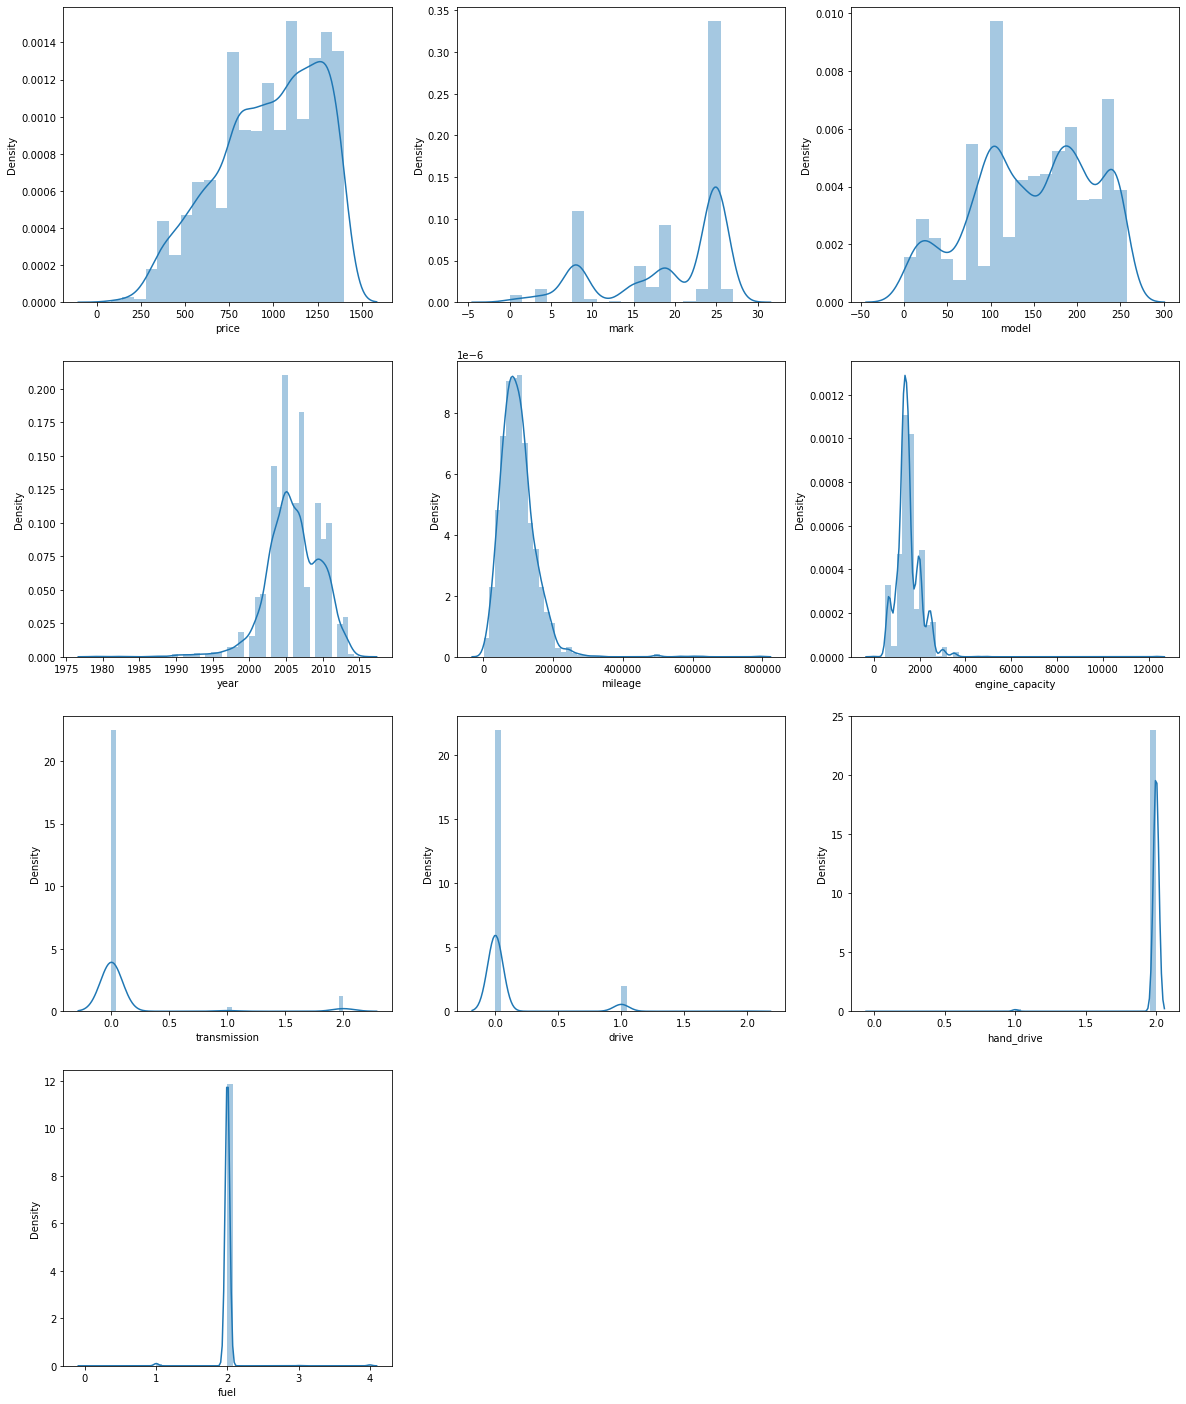

In [21]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [22]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [23]:
index=np.where(df['mark']>(q3.mark+(1.5*iqr.mark)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(2318, 10)

In [24]:
index=np.where(df['model']>(q3.model+(1.5*iqr.model)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(2318, 10)

In [25]:
index=np.where(df['year']>(q3.year+(1.5*iqr.year)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(2318, 10)

In [26]:
index=np.where(df['mileage']>(q3.mileage+(1.5*iqr.mileage)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(2272, 10)

In [27]:
index=np.where(df['engine_capacity']>(q3.engine_capacity+(1.5*iqr.engine_capacity)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(2232, 10)

In [28]:
index=np.where(df['hand_drive']>(q3.hand_drive+(1.5*iqr.hand_drive)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(2232, 10)

In [29]:
index=np.where(df['fuel']>(q3.fuel+(1.5*iqr.fuel)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(2227, 10)

In [30]:
index=np.where(df['mark']<(q3.mark-(1.5*iqr.mark)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(1762, 10)

In [31]:
index=np.where(df['model']<(q3.model-(1.5*iqr.model)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(1574, 10)

In [32]:
index=np.where(df['year']<(q3.year-(1.5*iqr.year)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(1461, 10)

In [33]:
index=np.where(df['mileage']<(q3.mileage-(1.5*iqr.mileage)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(1358, 10)

In [34]:
index=np.where(df['engine_capacity']<(q3.engine_capacity-(1.5*iqr.engine_capacity)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(1129, 10)

In [35]:
index=np.where(df['hand_drive']<(q3.hand_drive-(1.5*iqr.hand_drive)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(1126, 10)

In [36]:
index=np.where(df['fuel']<(q3.fuel-(1.5*iqr.fuel)))
df=df.drop(df.index[index])
df.reset_index()
df.shape

(1124, 10)

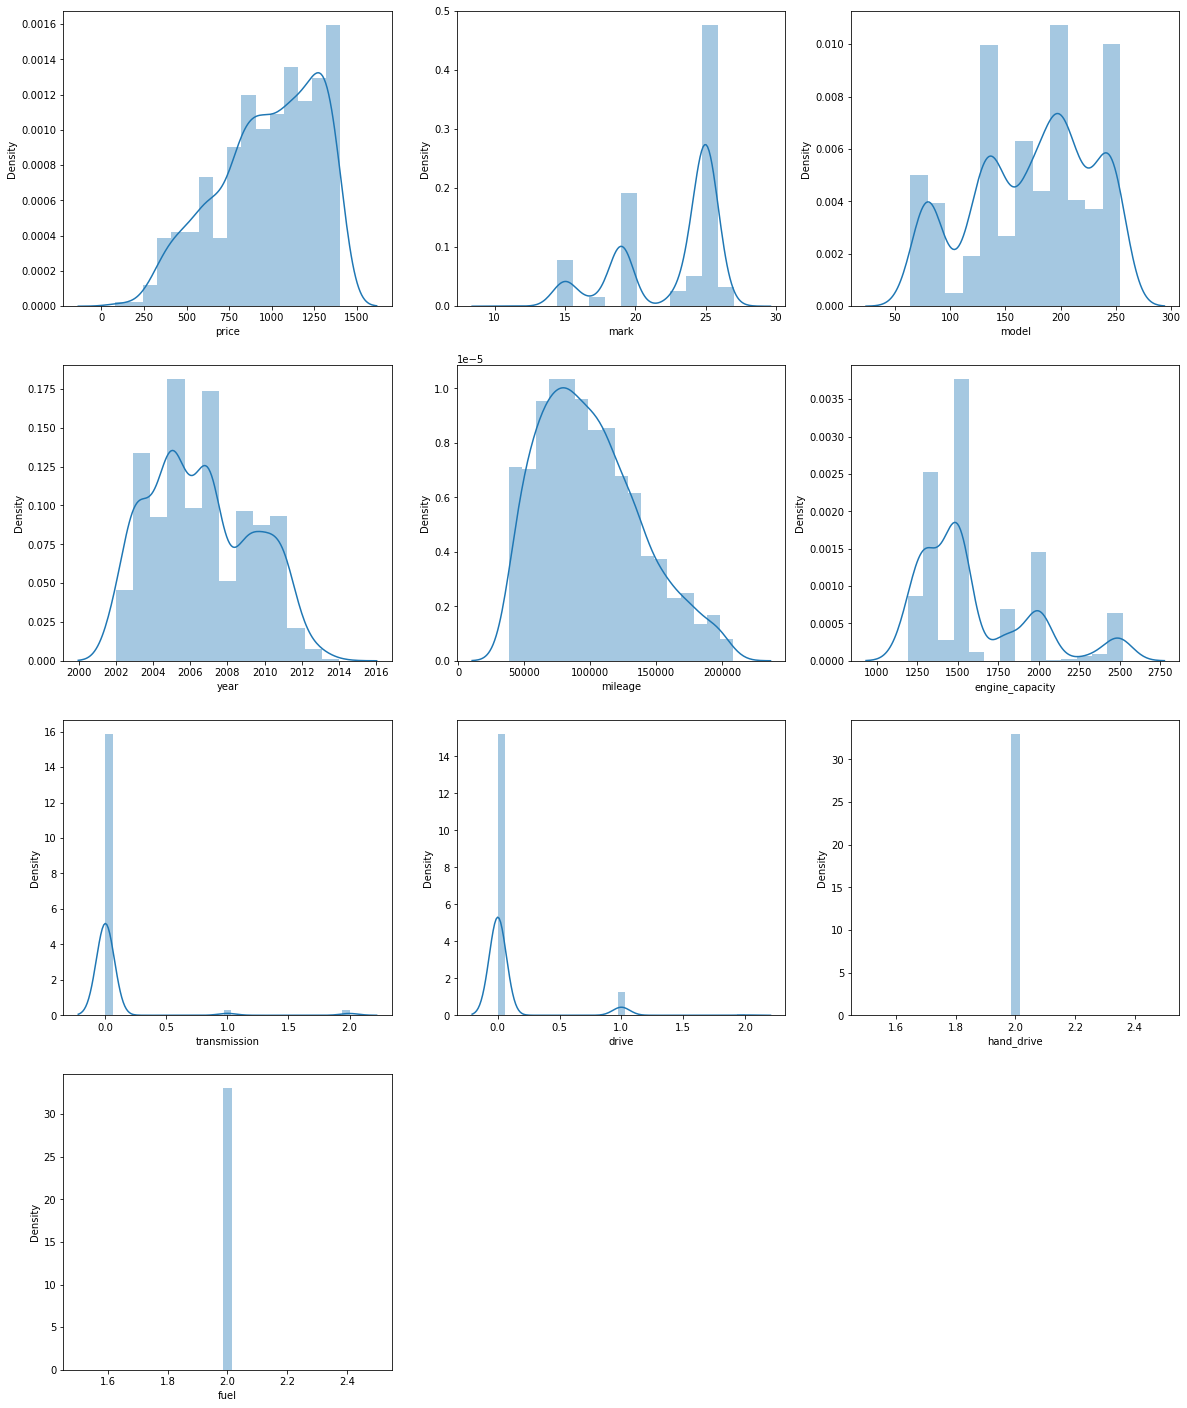

In [37]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [38]:
# Relationship - feature v/s label

In [39]:
df.drop('price',axis=1).corrwith(df.price)

mark               0.341915
model              0.093534
year              -0.275125
mileage            0.042780
engine_capacity    0.160787
transmission       0.037089
drive              0.046614
hand_drive              NaN
fuel                    NaN
dtype: float64

In [40]:
# Relationship - feature v/s feature

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop(columns=['price'])
y=df['price']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [43]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x.columns
print(vif)

        vif          Columns
0  1.271357             mark
1  1.093286            model
2  1.280718             year
3  1.065423          mileage
4  1.152582  engine_capacity
5  1.039132     transmission
6  1.152707            drive
7       NaN       hand_drive
8       NaN             fuel


In [44]:
# No multicollinearity found. We can take all.

In [45]:
# Train-Test

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [47]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [48]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)

Accuracy Score: 3.111111111111111

Classification Report:
               precision    recall  f1-score   support

         320       0.00      0.00      0.00         1
         330       0.00      0.00      0.00         1
         340       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         2
         390       0.00      0.00      0.00         6
         400       0.00      0.00      0.00         1
         450       0.00      0.00      0.00         3
         457       0.00      0.00      0.00         1
         460       0.00      0.00      0.00         1
         498       0.00      0.00      0.00         1
         530       0.00      0.00      0.00         1
         550       0.00      0.00      0.00         1
         560       0.00      0.00      0.00         1
         570       0.00      0.00      0.00         2
         580       0.00      0.00      0.00         2
         588       0.00      0.00      0.00         2
         599       0.0

In [49]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, x, y)

Accuracy Score: 4.444444444444445

Classification Report:
               precision    recall  f1-score   support

         320       0.00      0.00      0.00         1
         330       0.00      0.00      0.00         1
         340       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         2
         390       0.00      0.00      0.00         6
         400       0.00      0.00      0.00         1
         450       0.00      0.00      0.00         3
         457       0.00      0.00      0.00         1
         460       0.00      0.00      0.00         1
         490       0.00      0.00      0.00         0
         498       0.00      0.00      0.00         1
         500       0.00      0.00      0.00         0
         530       0.00      0.00      0.00         1
         550       0.00      0.00      0.00         1
         560       0.00      0.00      0.00         1
         570       0.00      0.00      0.00         2
         580       0.0

In [50]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x,y)

Accuracy Score: 6.666666666666667

Classification Report:
               precision    recall  f1-score   support

          80       0.00      0.00      0.00         0
         313       0.00      0.00      0.00         0
         320       0.00      0.00      0.00         1
         330       0.00      0.00      0.00         1
         340       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         2
         380       0.00      0.00      0.00         0
         381       0.00      0.00      0.00         0
         390       0.75      0.50      0.60         6
         400       0.00      0.00      0.00         1
         428       0.00      0.00      0.00         0
         430       0.00      0.00      0.00         0
         440       0.00      0.00      0.00         0
         450       0.00      0.00      0.00         3
         457       0.00      0.00      0.00         1
         460       0.00      0.00      0.00         1
         467       0.0

In [51]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x,y)

Accuracy Score: 8.88888888888889

Classification Report:
               precision    recall  f1-score   support

         220       0.00      0.00      0.00         0
         320       0.00      0.00      0.00         1
         330       0.00      0.00      0.00         1
         340       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         2
         380       0.00      0.00      0.00         0
         390       0.50      0.33      0.40         6
         400       0.00      0.00      0.00         1
         430       0.00      0.00      0.00         0
         440       0.00      0.00      0.00         0
         450       0.00      0.00      0.00         3
         457       0.00      0.00      0.00         1
         460       0.00      0.00      0.00         1
         467       0.00      0.00      0.00         0
         490       0.00      0.00      0.00         0
         495       0.00      0.00      0.00         0
         498       0.00

Cross Validation Score: 7.736507936507936

Accuracy Score - Cross Validation Score is 1.1523809523809536


In [52]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
lm.score(X_test,Y_test)

0.16987069172508107

In [53]:
filename = "FinalModel.pkl"
joblib.dump(lm, filename)

['FinalModel.pkl']